# Import Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [4]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Target >> df["Species"]

In [ ]:
df.info()

In [ ]:
df["Species"].value_counts()

<AxesSubplot:xlabel='Species', ylabel='count'>

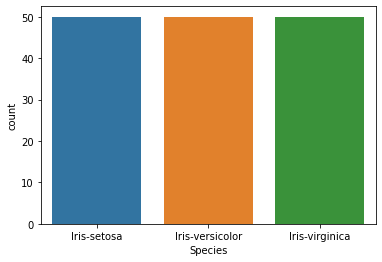

In [6]:
sns.countplot(x = df["Species"])

In [7]:
df["Id"].nunique()

150

In [8]:
df.drop("Id", axis = 1, inplace = True)

# Train Test Split

In [9]:
x = df.drop('Species', axis = 1)
y = df["Species"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.45, random_state=23, stratify=y)
y_train.value_counts()

Iris-versicolor    28
Iris-virginica     27
Iris-setosa        27
Name: Species, dtype: int64

In [11]:
y_test.value_counts()

Iris-setosa        23
Iris-virginica     23
Iris-versicolor    22
Name: Species, dtype: int64

In [12]:
40/50

0.8

# Model Training

In [13]:
log_clf = LogisticRegression(multi_class = "ovr")
log_clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

# Evaluation

In [14]:
# Testing

y_pred_test = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print("Multilabel Confusion Matrix :\n", multilabel_cnf_matrix)

acc_score = accuracy_score(y_test, y_pred_test)
print("Accuracy Score :", acc_score)

class_report = classification_report(y_test, y_pred_test)
print("Classification Report :", class_report)


Confusion Matrix :
 [[23  0  0]
 [ 0 17  5]
 [ 0  1 22]]
Multilabel Confusion Matrix :
 [[[45  0]
  [ 0 23]]

 [[45  1]
  [ 5 17]]

 [[40  5]
  [ 1 22]]]
Accuracy Score : 0.9117647058823529
Classification Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.77      0.85        22
 Iris-virginica       0.81      0.96      0.88        23

       accuracy                           0.91        68
      macro avg       0.92      0.91      0.91        68
   weighted avg       0.92      0.91      0.91        68



In [15]:
# Training

y_pred_train = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train,y_pred_train)
print("Multilabel Confusion Matrix :\n", multilabel_cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :", acc_score)

class_report = classification_report(y_train,y_pred_train)
print("Classification Report :", class_report)


Confusion Matrix :
 [[27  0  0]
 [ 0 25  3]
 [ 0  1 26]]
Multilabel Confusion Matrix :
 [[[55  0]
  [ 0 27]]

 [[53  1]
  [ 3 25]]

 [[52  3]
  [ 1 26]]]
Accuracy Score : 0.9512195121951219
Classification Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        27
Iris-versicolor       0.96      0.89      0.93        28
 Iris-virginica       0.90      0.96      0.93        27

       accuracy                           0.95        82
      macro avg       0.95      0.95      0.95        82
   weighted avg       0.95      0.95      0.95        82



In [22]:
x_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [27]:
def get_prediction(SepalLengthCm, SepalWidthCm,PetalLengthCm,PetalWidthCm):
    prediction = log_clf.predict([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
    return prediction

In [28]:
x_test[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,5.0,3.5,1.3,0.3
54,6.5,2.8,4.6,1.5
25,5.0,3.0,1.6,0.2
60,5.0,2.0,3.5,1.0
143,6.8,3.2,5.9,2.3


In [30]:
y_test[:5]

40         Iris-setosa
54     Iris-versicolor
25         Iris-setosa
60     Iris-versicolor
143     Iris-virginica
Name: Species, dtype: object

In [31]:
get_prediction(6.5,2.8,4.6,1.5)

C:\Users\suchita.berde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [33]:
y_prob_test = log_clf.predict_proba(x_test)
y_prob_test[:5]

[[8.96542300e-01 1.03449198e-01 8.50195927e-06]
 [8.10942611e-03 5.26110267e-01 4.65780307e-01]
 [7.75607000e-01 2.24377233e-01 1.57668146e-05]
 [9.20007482e-02 8.96188669e-01 1.18105829e-02]
 [1.95395503e-04 2.13510947e-01 7.86293657e-01]]


In [ ]:
0.8    0.1    0.000 >> class 0
0.008  0.526  0.4   >> class 1